# Faster convolution with the DFT

In [1]:
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt

In [2]:
# Time domain convolve from Topic 2
def convolve(signal, system):
    res = np.zeros(len(signal) + len(system) - 1)
    for sample_ind in range(len(signal)):
        if (sample_ind % (44100/5) == 0):
            print(sample_ind)
        sample = signal[sample_ind]
        for system_ind in range(len(system)):
            output = sample * system[system_ind]
            res_ind = sample_ind + system_ind
            res[res_ind] = res[res_ind] + output
    return res

# thinkdsp p84
def synthesis_matrix(N):
    ts = np.arange(N) / N
    fs = np.arange(N)
    args = np.outer(ts, fs)
    M = np.exp(1j * np.pi*2 * args)
    return M

# thinkdsp p84
def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps

# thinkdsp p84
def idft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.dot(ys) / N
    return amps


0
[0.      0.      0.      0.125   0.3125  0.25    0.125   0.15625 0.0625
 0.      0.      0.      0.      0.      0.      0.      0.     ]
[ 9.86864911e-17 -4.93432455e-17 -6.16790569e-17  1.25000000e-01
  3.12500000e-01  2.50000000e-01  1.25000000e-01  1.56250000e-01
  6.25000000e-02]


<StemContainer object of 3 artists>

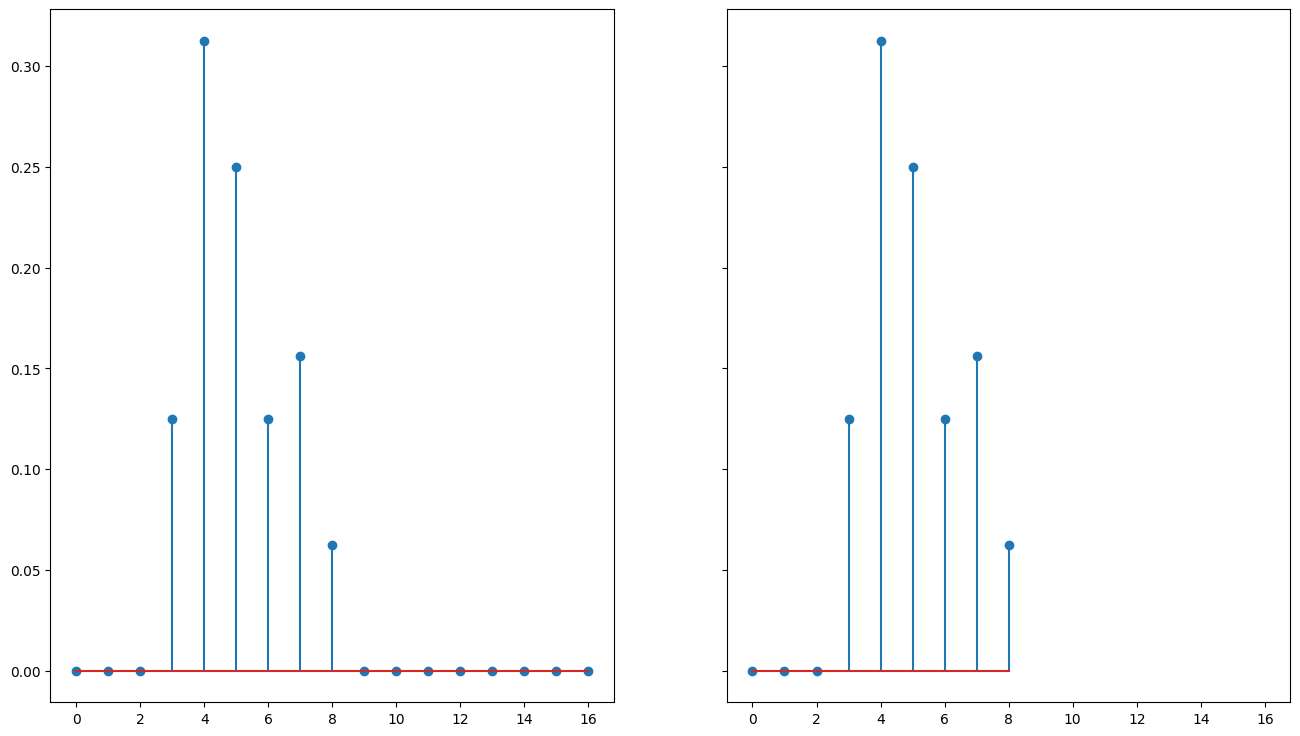

In [3]:
signal = np.array([0.25, 0.5, 0.25, 0.125, 0.25, 0, 0, 0, 0])
system = np.array([0, 0, 0, 0.5, 0.25, 0, 0, 0, 0])

res1 = convolve(signal, system)

sig_spec = dft(signal)
sys_spec = dft(system)
res2 = idft(sig_spec * sys_spec)

print(res1)
print(res2.real)


fig, ax = plt.subplots(ncols=2, figsize=[16, 9], sharey=True, sharex=True)

ax[0].stem(res1)
ax[1].stem(res2.real)






## What does IDFT do?

In [4]:
signal = [1,2,3,4]
spec = dft(signal)
new_sig = idft(spec)

print (signal)
print(new_sig.real)




[1, 2, 3, 4]
[1. 2. 3. 4.]


## The big shocker: convolution in the frequency domain

0
[1.    1.5   0.75  0.375 0.125 0.    0.    0.    0.    0.    0.    0.
 0.   ]
[1.00000000e+00 1.50000000e+00 7.50000000e-01 3.75000000e-01
 1.25000000e-01 6.34413157e-17 4.44089210e-16]
[ 2.22044605e-16  4.44089210e-16  3.33066907e-16 -1.11022302e-16
  0.00000000e+00 -6.34413157e-17 -4.44089210e-16]


C:\Users\truon\AppData\Roaming\Python\Python313\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\truon\AppData\Roaming\Python\Python313\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\truon\AppData\Roaming\Python\Python313\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Frequency domain convolve')

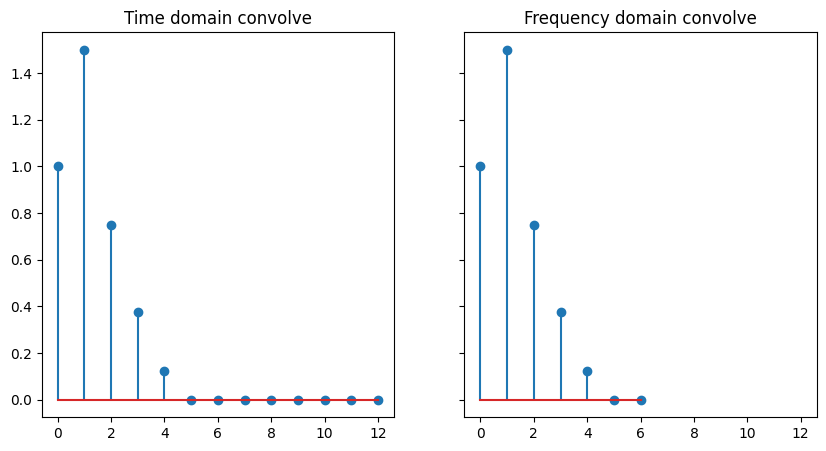

In [5]:
signal = [1, 1, 0, 0, 0, 0, 0]
system = [1,0.5, 0.25, 0.125, 0, 0, 0]

# using the time domain convolve

res1 = convolve(signal, system)

# or convert to frequency domain
spec_sig = dft(signal)
spec_sys = dft(system)
# multiply the two spectra
spec_conv = spec_sig * spec_sys
# and reverse back to a signal
res2 = idft(spec_conv)

# now do an inverse DFT
print(res1)
print(res2.real)

# floating point errors cause minimal difference
print(res1[0:len(res2.real)] - res2.real)

fig,ax = plt.subplots(ncols=2, figsize=[10, 5], sharey=True, sharex=True)
ax[0].stem(res1)
ax[0].set_title("Time domain convolve")
ax[1].stem(res2)
ax[1].set_title("Frequency domain convolve")

